## **Sepsis Classification Machine Learning Project**

## **Business Understanding**

Sepsis, a life-threatening condition, arises from the body's exaggerated response to an infection, causing widespread inflammation, organ damage, and potential organ failure. Prompt medical intervention is essential, as sepsis is often triggered by various infections. Symptoms encompass fever, rapid heart rate, breathing difficulties, low blood pressure, and altered mental status. Treatment entails antibiotics, intravenous fluids, and supportive care. Early detection is paramount for a favorable prognosis.

This project centers on the early detection and classification of sepsis, a pivotal aspect of healthcare. Timely identification markedly improves patient outcomes. The objective is to construct a robust machine learning model for sepsis classification and deploy it as a web application using FastAPI, facilitating real-time predictions.

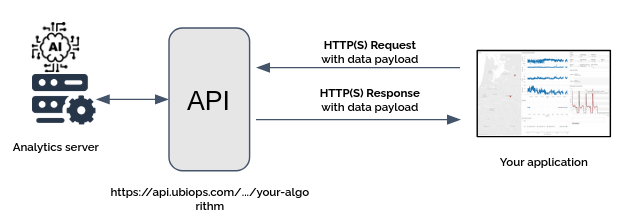

Source : The benefits of Machine Learning APIs - UbiOps

## **Project Description**

As we embark on our project journey, our first step will be to construct a minimal API demo utilizing FastAPI. This preliminary phase is crucial for ensuring that all components are correctly configured and operating as intended.

Following the successful setup of the demo, our focus will shift to crafting our own API tailored to interact seamlessly with a Machine Learning model. This bespoke API will facilitate the following workflow:

1. Receiving data through API requests from our clients.
2. Collaboratively processing the received data to prepare it for ingestion into the Machine Learning model.
3. Transmitting the preprocessed data to the Machine Learning model for prediction.
4. Coordinating the handling of predictions generated by the model.
5. Orchestrating the delivery of processed predictions as the API's response to our clients' initial requests.
By collectively implementing this comprehensive process, our API will empower users to harness the capabilities of Machine Learning, thereby enabling them to access valuable insights and predictions derived from their input data.






<b>1.1. Objectives

<b>Understanding the Data:

Comprehensively analyze patient data, including health-related features, demographics, and sepsis presence or absence. This understanding enables healthcare professionals to make informed decisions regarding patient care and intervention.

<b>Sepsis Prediction:

Develop a precise machine learning classification model to predict the likelihood of sepsis based on provided features. Early and accurate sepsis prediction is crucial for timely medical intervention, improving patient outcomes.

<b>Integration into Web Application:

Incorporate the trained sepsis classification model into a web application using FastAPI. This application serves as a practical tool for healthcare practitioners to input patient data and receive real-time sepsis risk predictions, facilitating clinical decision-making.

<b>1.2. Methodology

To achieve the project objectives, follow a structured approach:

<b>Data Understanding:

Explore patient data, including age, vital signs, and medical history, to gain insights and identify data quality issues.

<b>Data Preparation:

Handle missing values, perform feature engineering, and encode categorical variables as needed to prepare data for machine learning model training.

<b>Model Development:

Select and implement a suitable machine learning classification model for sepsis prediction. Train the model on historical patient data to identify patterns indicative of sepsis.

<b>Model Evaluation:

Assess model performance using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC. Rigorous evaluation identifies the model's effectiveness in predicting sepsis cases.

<b>FastAPI Integration:

Integrate the trained machine learning model into a FastAPI-based web application, providing a user-friendly interface for healthcare professionals to input patient data and obtain sepsis risk predictions.

<b>Testing and Validation:

Conduct thorough testing and validation of the web application to ensure reliability and accuracy in real-time sepsis risk assessment.

<b>Documentation:

Provide detailed documentation on using the web application, including input requirements and result interpretation.

By following this methodology, the project aims to provide healthcare professionals with a valuable tool for early sepsis detection and decision support, ultimately contributing to improved patient care and outcomes.

 ## **The Hypothesis**

 ### **Null Hypothesis:** 
The mean Plasma glucose level (PRG) is not significantly different between patients who develop sepsis during their ICU stay and those who do not.

### **Alternative Hypothesis:**
The mean Plasma glucose level (PRG) is significantly different between patients who develop sepsis during their ICU stay and those who do not.


## **The Analytical Questions**

1. What is the average Plasma glucose level (PRG) among patients who develop sepsis compared to those who do not?
2. Are there any significant differences in Blood Pressure (PR), Body mass index (M11), or age between patients who develop sepsis and those who do not?
3. Is there a correlation between insurance status and the likelihood of developing sepsis during an ICU stay?
4. How does the prevalence of sepsis vary across different age groups and insurance statuses?
5. What is the prevalence of sepsis among the patient population, & identify factors contributing to the tendency of developing sepsis?
6. Is there a significant correlation between a patient's body mass and their susceptibility to sepsis, and can body mass be considered a potential risk factor for sepsis development?


##  **Data Understanding**

1. ID: number to represent patient ID
2. PRG: Plasma glucose
3. PL: Blood Work Result-1 (mu U/ml)
4. PR: Blood Pressure (mm Hg)
5. SK: Blood Work Result-2 (mm)
6. TS: Blood Work Result-3 (mu U/ml)
7. M11: Body mass index (weight in kg/(height in m)^2
8. BD2: Blood Work Result-4 (mu U/ml)
9. Age: patients age (years)
10. Insurance: If a patient holds a valid insurance card
11. Sepsis: Positive: if a patient in ICU will develop a sepsis , and Negative: otherwis

Import the necessary modules/packages

In [6]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install plotly
%pip install scipy
%pip install scikit-learn
%pip install imbalanced-learn
%pip install xgboost
%pip install Jinja2
%pip install nbformat --upgrade

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [7]:
# Data manipulation packages
import pandas as pd
import numpy as np

#Data visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Preprocessing
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import StandardScaler,FunctionTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Handling class imbalance by oversampling
from imblearn.over_sampling import SMOTE 

# Models
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Metrics
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score, roc_auc_score,roc_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Other Packages
import warnings
warnings.filterwarnings("ignore")

import joblib
import os

# 2. Loading data Paitients_Files_Test and train

In [8]:
df_Paitients_Files_Test= pd.read_csv('Dataset/Paitients_Files_Test.csv')
# Display the first few rows of the DataFrame
df_Paitients_Files_Test.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


In [9]:
df_Paitients_Files_Train= pd.read_csv('Dataset/Paitients_Files_Train.csv')
# Display the first few rows of the DataFrame
df_Paitients_Files_Train.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [10]:
#info of Paitients_Files_Test
df_Paitients_Files_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [11]:
df_Paitients_Files_Train.columns

Index(['ID', 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance',
       'Sepssis'],
      dtype='object')

In [12]:
# Check for duplicated rows if any in the first 599 data points
df_Paitients_Files_Train.duplicated().sum()

0

In [13]:
# check unique values for the first 599 dataFrame
unique_values_per_column = df_Paitients_Files_Train.apply(pd.unique)
print(unique_values_per_column)

ID           [ICU200010, ICU200011, ICU200012, ICU200013, I...
PRG          [6, 1, 8, 0, 5, 3, 10, 2, 4, 7, 9, 11, 13, 15,...
PL           [148, 85, 183, 89, 137, 116, 78, 115, 197, 125...
PR           [72, 66, 64, 40, 74, 50, 0, 70, 96, 92, 80, 60...
SK           [35, 29, 0, 23, 32, 45, 19, 47, 38, 30, 41, 33...
TS           [0, 94, 168, 88, 543, 846, 175, 230, 83, 96, 2...
M11          [33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31.0, 35....
BD2          [0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.2...
Age          [50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 5...
Insurance                                               [0, 1]
Sepssis                                   [Positive, Negative]
dtype: object


In [14]:
# Display summary statistics for df_Paitients_Files_Train dataset
df_Paitients_Files_Train.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
# Check for missing values in columns
df_Paitients_Files_Train.isnull().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

### <b> Exploratory Data Analysis

### <b> Univariate Data analysis

In [16]:
sep_df=df_Paitients_Files_Train['Sepssis'].value_counts(normalize=True)
sep_df

Sepssis
Negative    0.652755
Positive    0.347245
Name: proportion, dtype: float64

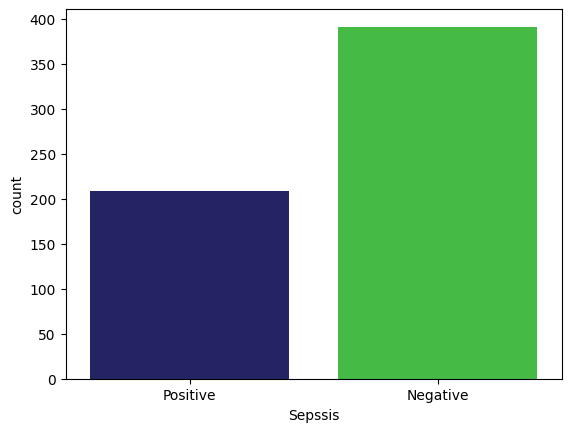

In [17]:
sns.countplot(data=df_Paitients_Files_Train, x='Sepssis', palette=['midnightblue', 'limegreen'])
plt.show()

<b>The dataset exhibits an imbalance, where the number of negative sepsis cases surpasses that of positive sepsis cases.

In [18]:
sep_df=df_Paitients_Files_Train['Insurance'].value_counts(normalize=True)
sep_df

Insurance
1    0.686144
0    0.313856
Name: proportion, dtype: float64

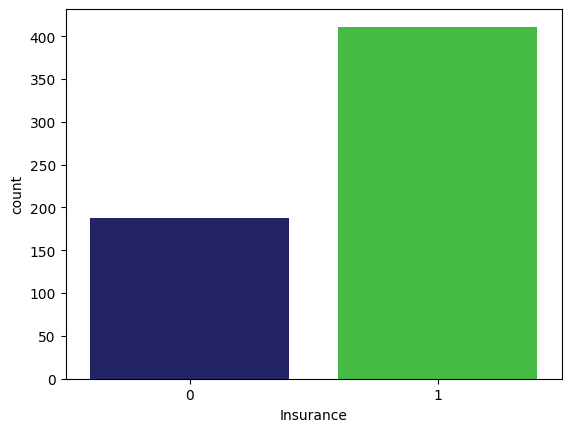

In [19]:
sns.countplot(data=df_Paitients_Files_Train, x='Insurance', palette=['midnightblue', 'limegreen'])
plt.show()

<b> The count of patients with valid health insurance coverage exceeds the count of those without valid coverage.


In [20]:
cols = [ 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance']

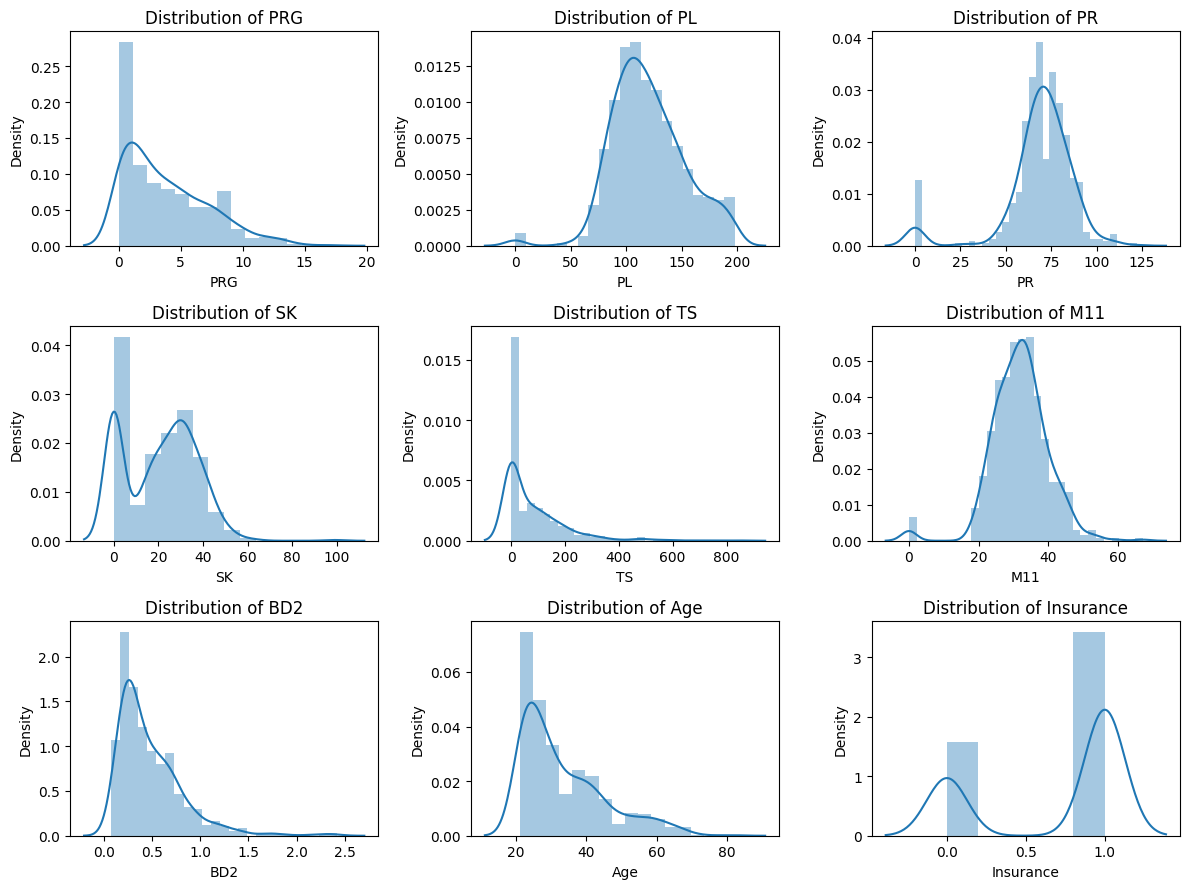

In [21]:
# Calculate the number of rows and columns for subplots
num_cols = 3
num_rows = (len(cols) + num_cols - 1) // num_cols  

# Set up subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 3 * num_rows))

# Plot histograms for specific columns
for i, col in enumerate(cols):
    row_idx = i // num_cols
    col_idx = i % num_cols
    sns.distplot(df_Paitients_Files_Train[col], kde=True,ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(f'Distribution of {col}')
    axes[row_idx, col_idx].set_xlabel(col)
    axes[row_idx, col_idx].set_ylabel('Density')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

1. Right-skewed distributions: PRG, PL, and PR have distributions skewed to the right. This means there are more data points on the left side of the distribution, with a tail extending towards higher values on the right.

2. Symmetrical distributions: SK and TS appear to have symmetrical distributions. This suggests the data for these variables is balanced around a central point, resembling a bell-shaped curve.

3. Center of distributions: The distribution of Age is centered around 50, indicating that most ages fall around this value. Similarly, the distribution of Insurance is centered around 0.5, suggesting most insurance values cluster around this point.

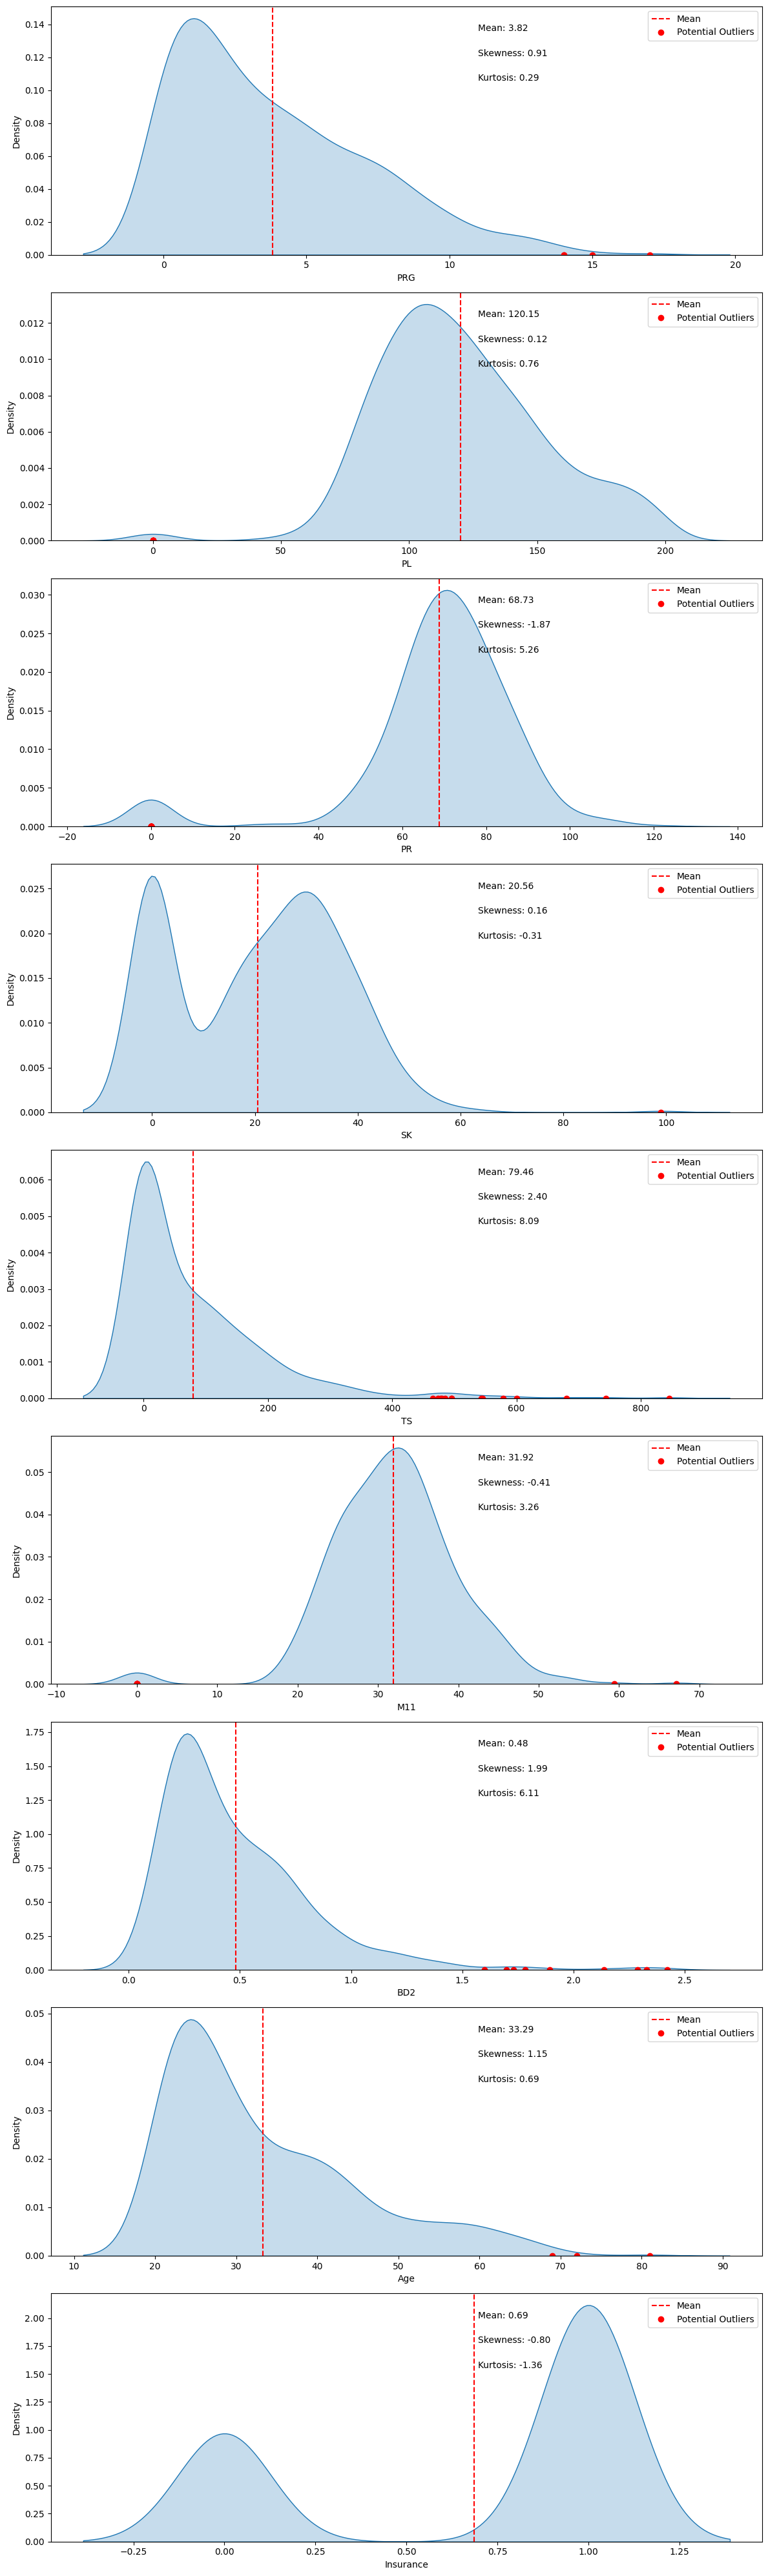

In [22]:
# Plot KDEs(kernel density estimation) for all columns
fig, axes = plt.subplots(nrows=len(cols), figsize=(12, 40))
for i, col in enumerate(cols):
    sns.kdeplot(data=df_Paitients_Files_Train, x=col, ax=axes[i], fill=True)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')
    
    # Calculate mean, skewness, and kurtosis
    mean_val = df_Paitients_Files_Train[col].mean()
    skewness_val = df_Paitients_Files_Train[col].skew()
    kurtosis_val = df_Paitients_Files_Train[col].kurtosis()
    
    # Add mean, skewness, and kurtosis as text annotations
    axes[i].text(0.6, 0.9, f'Mean: {mean_val:.2f}', transform=axes[i].transAxes)
    axes[i].text(0.6, 0.8, f'Skewness: {skewness_val:.2f}', transform=axes[i].transAxes)
    axes[i].text(0.6, 0.7, f'Kurtosis: {kurtosis_val:.2f}', transform=axes[i].transAxes)
    
    # Add mean line
    axes[i].axvline(mean_val, color='red', linestyle='--', label='Mean')
    
    # Add red dots to indicate potential outliers
    outliers = df_Paitients_Files_Train[(df_Paitients_Files_Train[col] > mean_val + 3 * df_Paitients_Files_Train[col].std()) | (df_Paitients_Files_Train[col] < mean_val - 3 * df_Paitients_Files_Train[col].std())]
    axes[i].plot(outliers[col], [0] * len(outliers), 'ro', label='Potential Outliers')
    
    # Add legend
    axes[i].legend()
    
plt.tight_layout()
plt.show()


<b> Kurtosis measures the "tailedness" of a distribution, while skewness measures its asymmetry.

1. PRG (Plasma Glucose): The KDE plot reveals a distribution skewed towards higher values, indicating positive skewness. Moreover, it's platykurtic, displaying a flatter peak and lighter tails compared to a normal distribution.
2. PL (Blood Work Result-1): The KDE plot suggests a roughly symmetric distribution with an average value around 120.15. This distribution is mesokurtic, resembling a normal distribution in shape.
3. PR (Blood Pressure): The KDE plot indicates a negatively skewed distribution with a more peaked shape, potentially hinting at outliers.
4. SK (Blood Work Result-2): The KDE plot shows a slightly positively skewed distribution with a flatter shape, implying fewer outliers or extreme values.
5. TS (Blood Work Result-3): The KDE plot suggests a positively skewed distribution with a more peaked shape and heavier tails. This implies a higher frequency of lower values and the possibility of outliers.
6. M11 (Body Mass Index - BMI): The KDE plot indicates a slightly negatively skewed distribution with a more peaked shape and heavier tails. This suggests a higher frequency of higher BMI values and potential outliers.
7. BD2 (Blood Work Result-4): The KDE plot suggests a positively skewed distribution with a more peaked shape and heavier tails, indicating a higher frequency of extreme values or outliers.
8. Age: The KDE plot indicates a positively skewed distribution, with a concentration of younger individuals. This suggests a uniform spread of values without significant outliers, with a prevalence of younger ages compared to older ones.

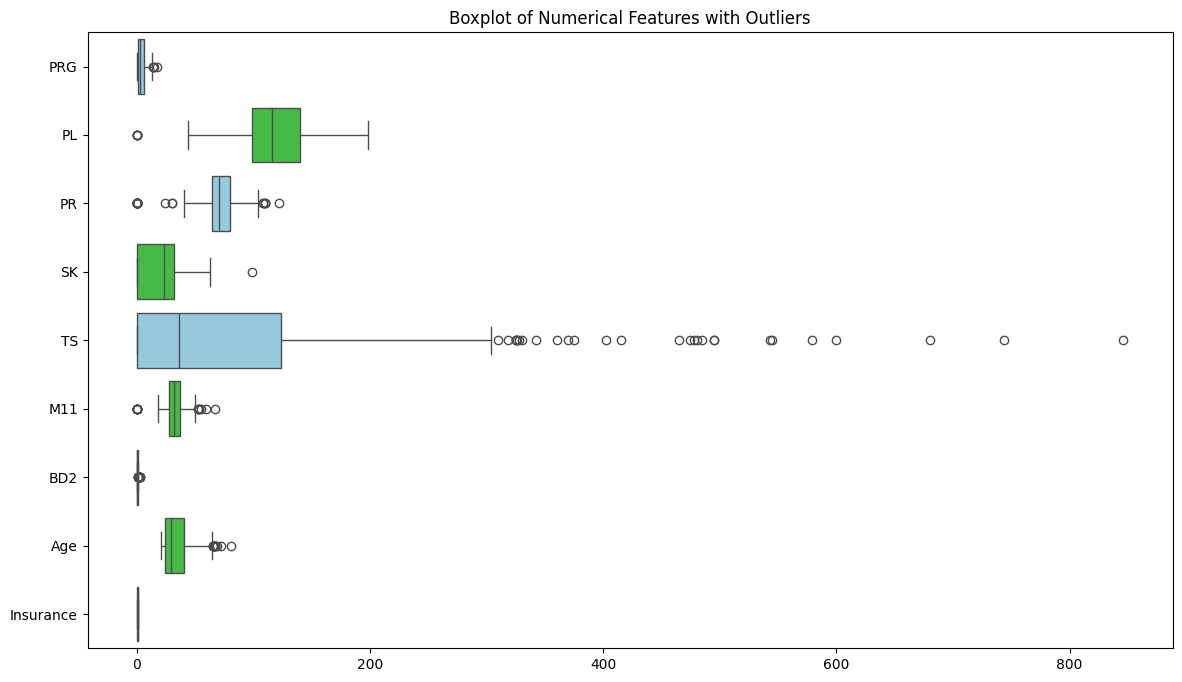

In [23]:
# Create a single boxplot to show outliers
fig, ax = plt.subplots(figsize=(14, 8))
sns.boxplot(data=df_Paitients_Files_Train[cols], whis=1.5, orient='h', palette=['skyblue', 'limegreen'])
plt.title("Boxplot of Numerical Features with Outliers")
plt.show()

Number of outliers in PRG: 4


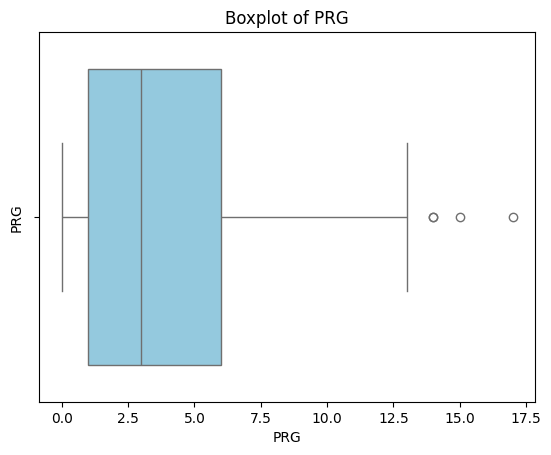

Number of outliers in PL: 0


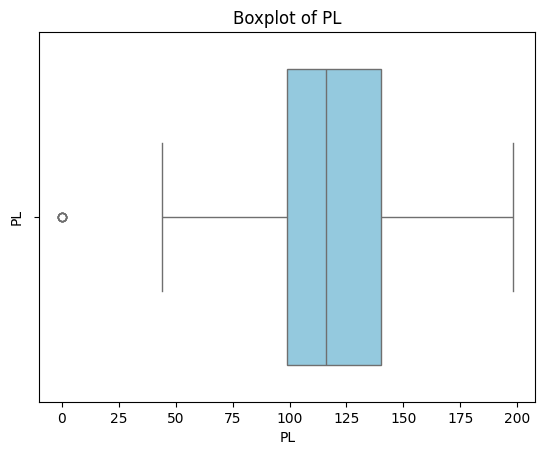

Number of outliers in PR: 6


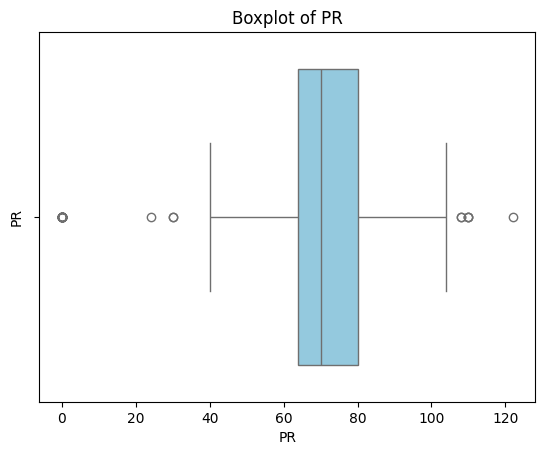

Number of outliers in SK: 1


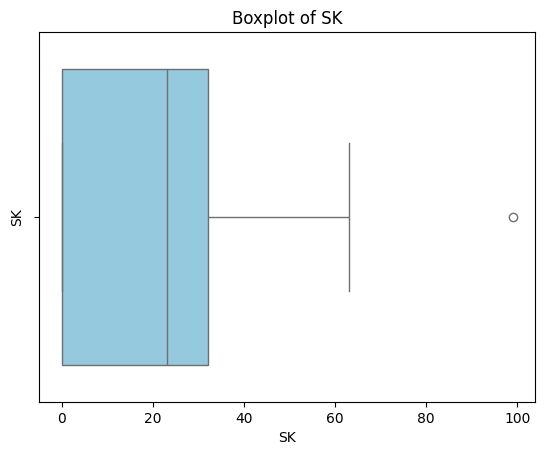

Number of outliers in TS: 28


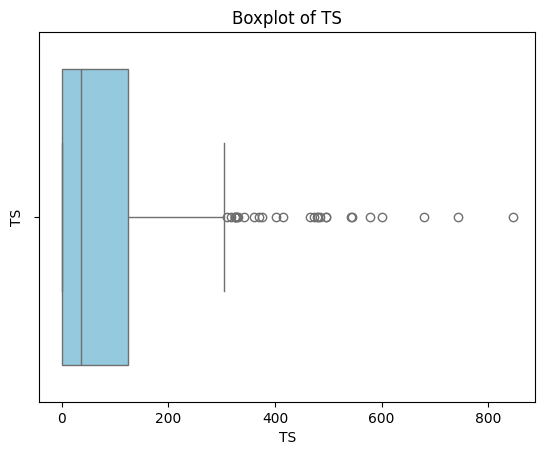

Number of outliers in M11: 7


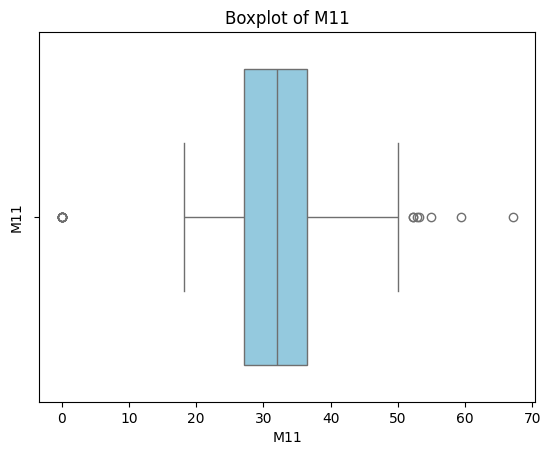

Number of outliers in BD2: 19


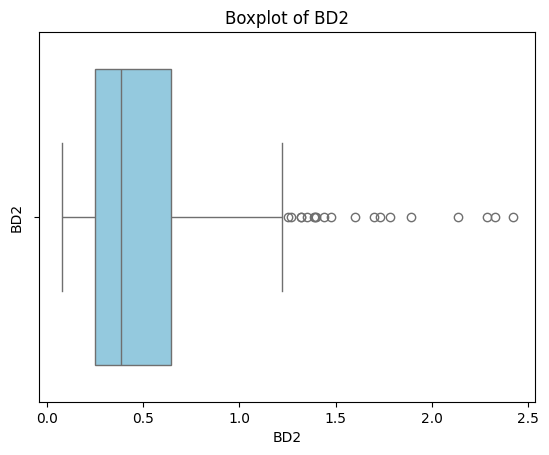

Number of outliers in Age: 12


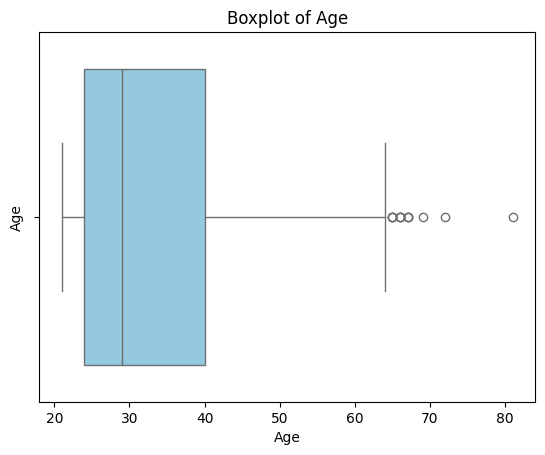

Number of outliers in Insurance: 0


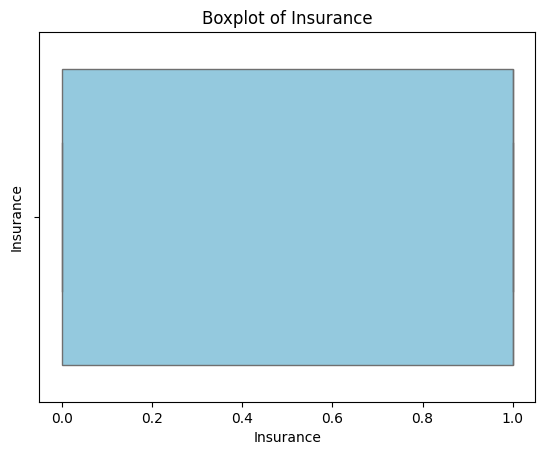

In [24]:
# # Create a box plot by Iterating over each numerical column
for col in cols:
    sns.boxplot(data = df_Paitients_Files_Train[col],whis=1.5, orient='h',palette=['skyblue', 'limegreen'])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

    # Get the outliers
    outliers = df_Paitients_Files_Train[df_Paitients_Files_Train[col] > df_Paitients_Files_Train[col].quantile(0.75) + 1.5 * (df_Paitients_Files_Train[col].quantile(0.75) - df_Paitients_Files_Train[col].quantile(0.25))]

    # Print the number of outliers
    num_outliers = len(outliers)
    print(f"Number of outliers in {col}: {num_outliers}")

    # Show the plot
    plt.show()

### <b>  Bivariate Analysis

In [25]:
df_Paitients_Files_Train.columns

Index(['ID', 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance',
       'Sepssis'],
      dtype='object')

In [26]:
cols = ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance']

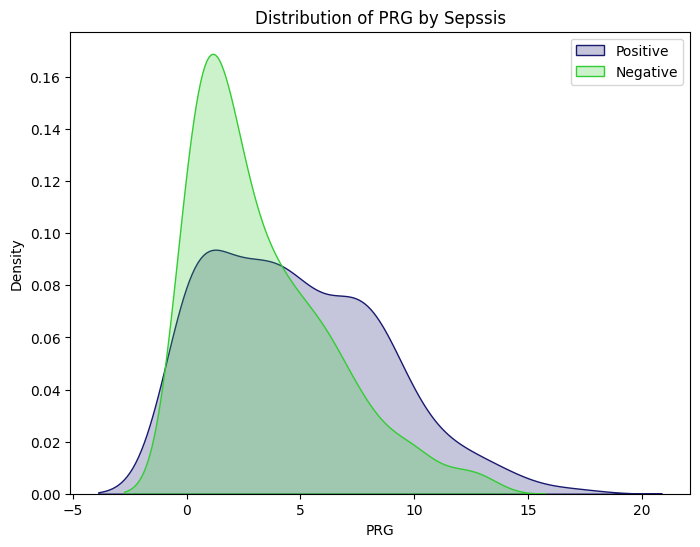

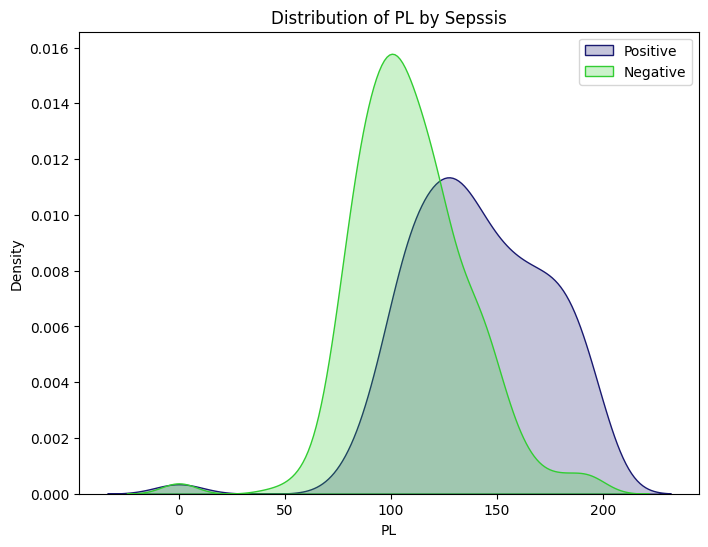

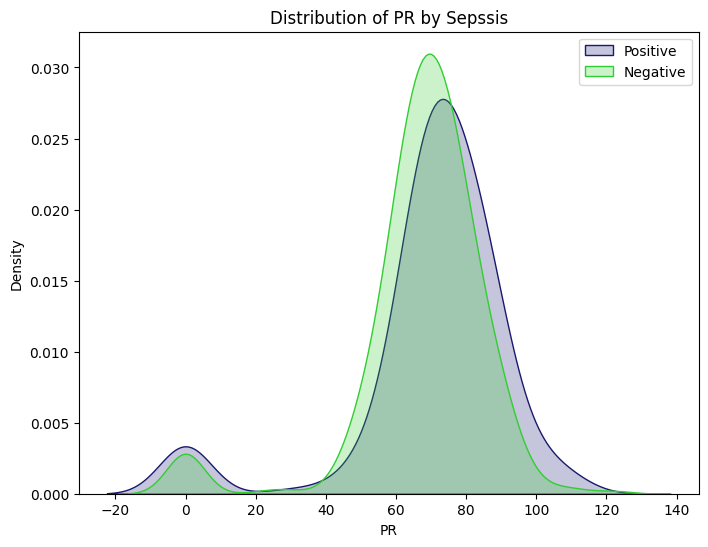

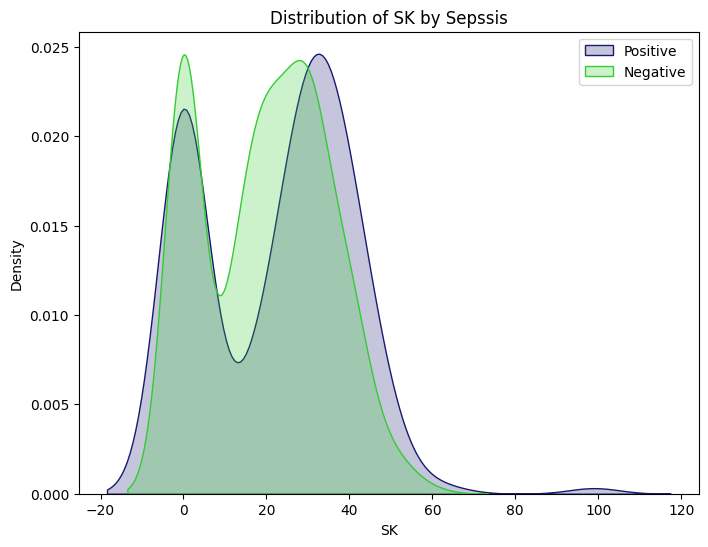

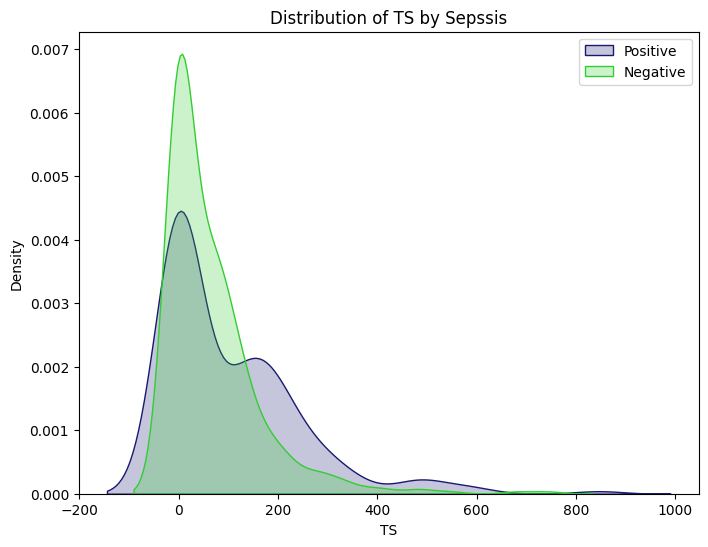

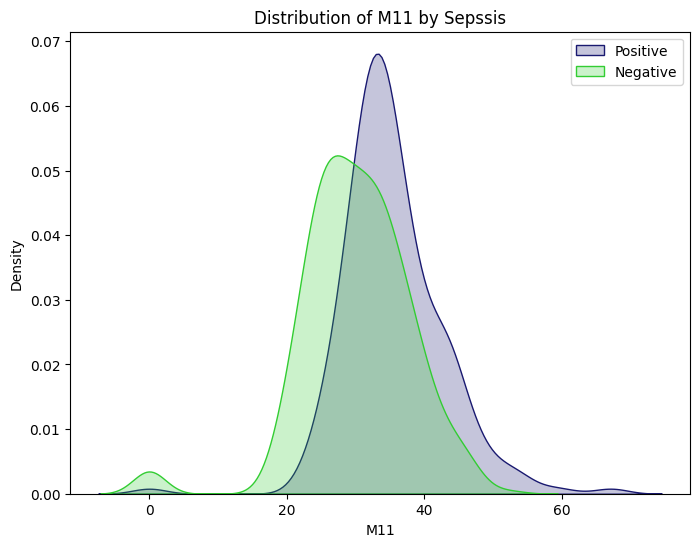

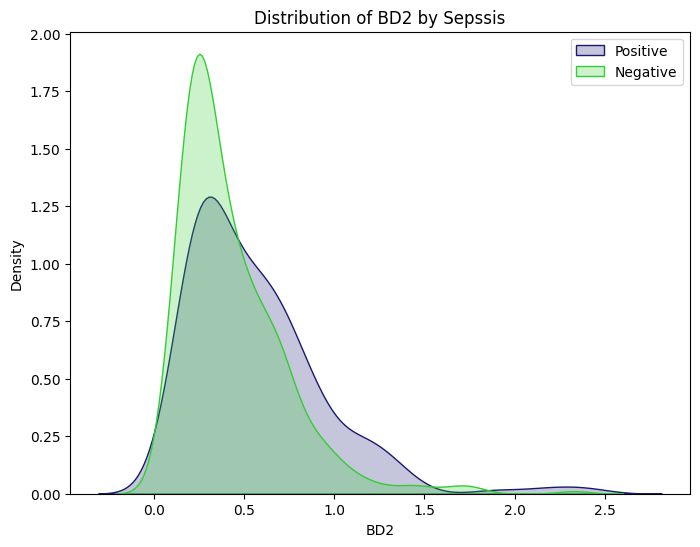

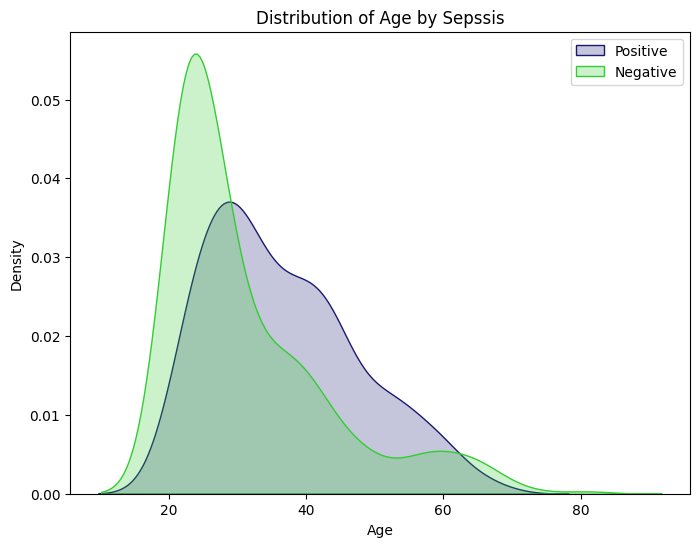

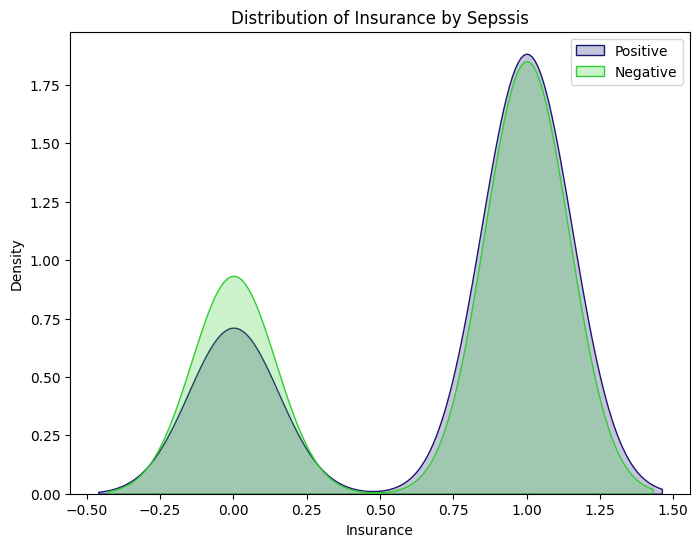

In [27]:
for i in cols:
    plt.figure(figsize=(8, 6))
    
    
    # Separate the data based on gender
    positive_data = df_Paitients_Files_Train[df_Paitients_Files_Train['Sepssis'] == 'Positive'][i]
    negative_data = df_Paitients_Files_Train[df_Paitients_Files_Train['Sepssis'] == 'Negative'][i]

    # Plot each gender's distribution
    sns.kdeplot(positive_data, shade=True, label='Positive',  color='midnightblue')
    sns.kdeplot(negative_data, shade=True, label='Negative', color='limegreen')

    plt.title(f'Distribution of {i} by Sepssis')
    plt.legend()
    plt.show()

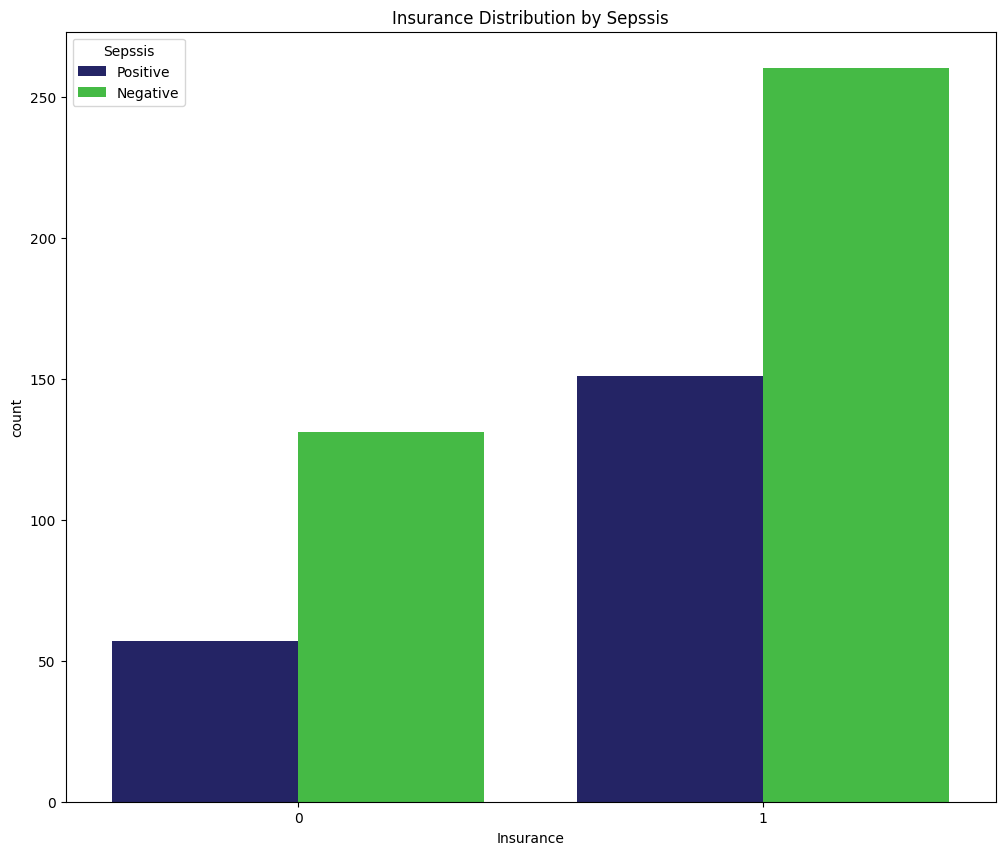

In [28]:
# Analysis for insurance column in relation to sepsis column
plt.figure(figsize=(12, 10))
sns.countplot(data=df_Paitients_Files_Train, x='Insurance', hue='Sepssis' ,palette=['midnightblue', 'limegreen'])
plt.title('Insurance Distribution by Sepssis')
plt.show()


In [29]:
df_Paitients_Files_Train['Age'].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64],
      dtype=int64)

In [30]:
df_Paitients_Files_Train['Age'].max()

81

In [31]:
df_Paitients_Files_Train['Age'].min()

21

In [32]:
# Define age bins
age_bins = [20,  40, 60,  80,  100]
age_labels = ["{0} - {1}".format(age_bins[i], age_bins[i + 1] - 1) for i in range(len(age_bins) - 1)]

# Create a new column 'Age Group' in your DataFrame
df_Paitients_Files_Train['age_group'] = pd.cut(df_Paitients_Files_Train['Age'], bins=age_bins, labels=age_labels, right=False)

# Display the counts of each age group
df_Paitients_Files_Train['age_group'].value_counts()

age_group
20 - 39    443
40 - 59    129
60 - 79     26
80 - 99      1
Name: count, dtype: int64

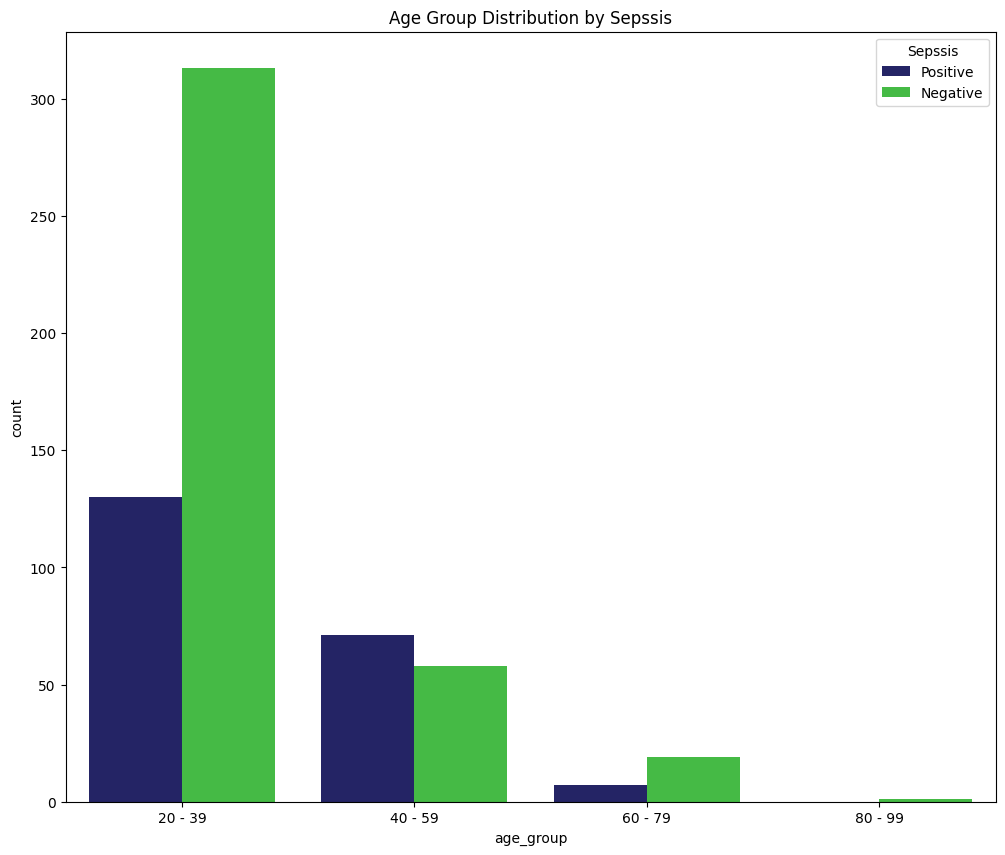

In [33]:
# Analysis for age_group column in relation to sepsis column
plt.figure(figsize=(12, 10))
sns.countplot(data=df_Paitients_Files_Train, x='age_group', hue='Sepssis' ,palette=['midnightblue', 'limegreen'])
plt.title('Age Group Distribution by Sepssis')
plt.show()

In [34]:
# Define bins and labels
bmi_bins = [0, 18.5, 24.9, 29.9, float('inf')]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese']

# Create a new column 'BMI Category' in your DataFrame
df_Paitients_Files_Train['BMI_category'] = pd.cut(df_Paitients_Files_Train['M11'], bins=bmi_bins, labels=bmi_labels, right=False)

# Display the counts of each BMI category
df_Paitients_Files_Train['BMI_category'].value_counts()

BMI_category
Obese          372
Overweight     136
Normal          78
Underweight     13
Name: count, dtype: int64

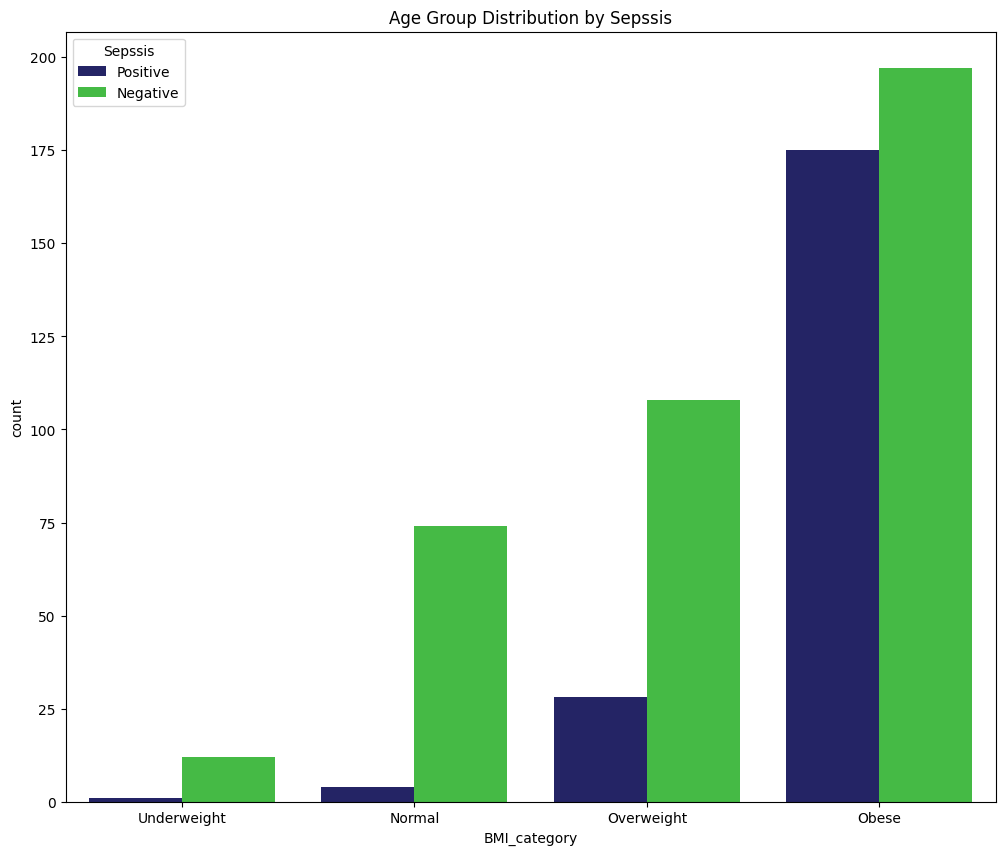

In [35]:
# Analysis for age_group column in relation to sepsis column
plt.figure(figsize=(12, 10))
sns.countplot(data=df_Paitients_Files_Train, x='BMI_category', hue='Sepssis' ,palette=['midnightblue', 'limegreen'])
plt.title('Age Group Distribution by Sepssis')
plt.show()

### <b> Multivariate Analysis

In [36]:
# Encoding the target variable
df_Paitients_Files_Train['Sepssis_mapped'] = df_Paitients_Files_Train['Sepssis'].map({'Negative': 0, 'Positive': 1})

In [37]:
df_corr =df_Paitients_Files_Train.corr(numeric_only=True)

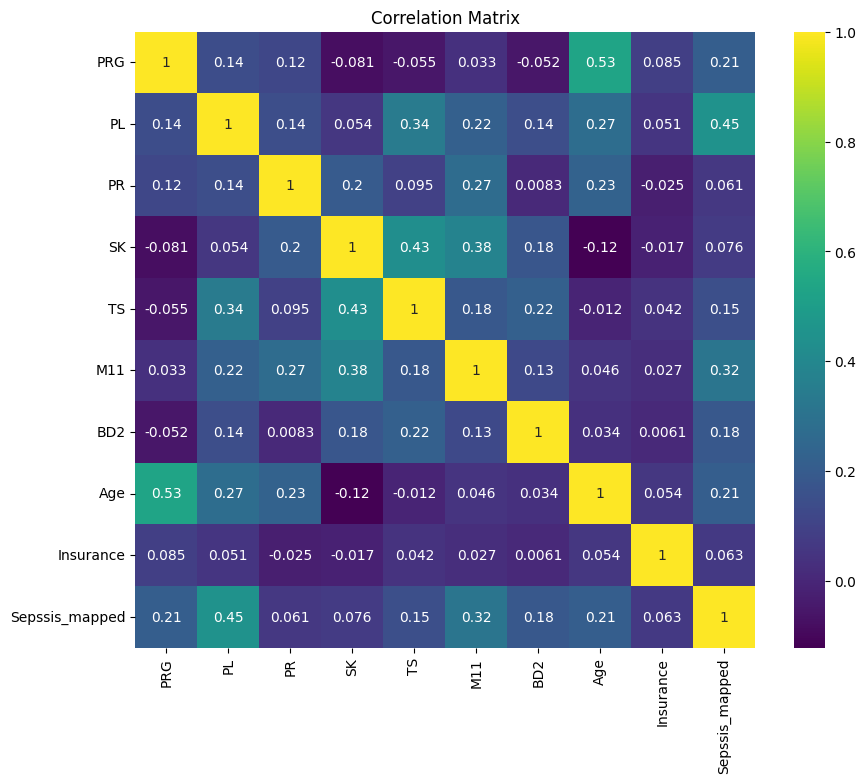

In [38]:
# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data=df_corr, annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

 ## **The Hypothesis**

 ### **Null Hypothesis:** 
The mean Plasma glucose level (PRG) is not significantly different between patients who develop sepsis during their ICU stay and those who do not.

### **Alternative Hypothesis:**
The mean Plasma glucose level (PRG) is significantly different between patients who develop sepsis during their ICU stay and those who do not.


In [39]:
prg_sepsis = df_Paitients_Files_Train[df_Paitients_Files_Train['Sepssis'] == 'Positive']['PRG']
prg_no_sepsis = df_Paitients_Files_Train[df_Paitients_Files_Train['Sepssis'] == 'Negative']['PRG']

# Perform t-test
t_statistic, p_value = ttest_ind(prg_sepsis, prg_no_sepsis, equal_var=False)

# Set significance level
alpha = 0.05

# Print results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Compare p-value to alpha
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in mean PRG between patients with and without sepsis.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in mean PRG between patients with and without sepsis.")


T-statistic: 4.842533902324343
P-value: 1.924247139438273e-06
Reject the null hypothesis. There is a significant difference in mean PRG between patients with and without sepsis.


## **The Analytical Questions**

1. What is the average Plasma glucose level (PRG) among patients who develop sepsis compared to those who do not?
2. Are there any significant differences in Blood Pressure (PR), Body mass index (M11), or age between patients who develop sepsis and those who do not?
3. Is there a correlation between insurance status and the likelihood of developing sepsis during an ICU stay?
4. How does the prevalence of sepsis vary across different age groups and insurance statuses?
5. What is the prevalence of sepsis among the patient population, & identify factors contributing to the tendency of developing sepsis?
6. Is there a significant correlation between a patient's body mass and their susceptibility to sepsis, and can body mass be considered a potential risk factor for sepsis development?


1. What is the average Plasma glucose level (PRG) among patients who develop sepsis compared to those who do not?

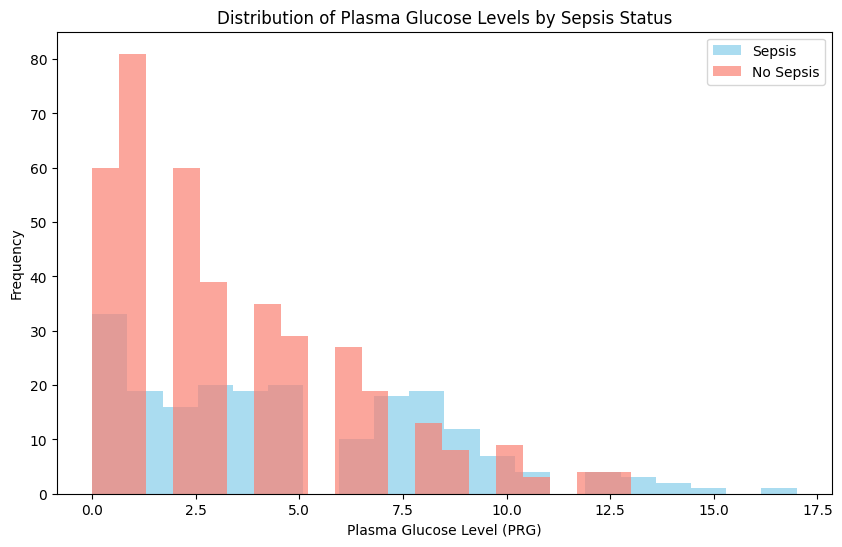

In [40]:
# Set up the figure
plt.figure(figsize=(10, 6))

# Plot histogram for patients with sepsis
plt.hist(prg_sepsis, bins=20, color='skyblue', alpha=0.7, label='Sepsis')

# Plot histogram for patients without sepsis
plt.hist(prg_no_sepsis, bins=20, color='salmon', alpha=0.7, label='No Sepsis')

# Add labels and title
plt.xlabel('Plasma Glucose Level (PRG)')
plt.ylabel('Frequency')
plt.title('Distribution of Plasma Glucose Levels by Sepsis Status')
plt.legend()

# Show plot
plt.show()


2. Are there any significant differences in Blood Pressure (PR), Body mass index (M11), or age between patients who develop sepsis and those who do not?

In [41]:
# Extract PR, M11, and age values for patients with and without sepsis
pr_sepsis = df_Paitients_Files_Train[df_Paitients_Files_Train['Sepssis'] == 'Positive']['PR']
pr_no_sepsis = df_Paitients_Files_Train[df_Paitients_Files_Train['Sepssis'] == 'Negative']['PR']

m11_sepsis = df_Paitients_Files_Train[df_Paitients_Files_Train['Sepssis'] == 'Positive']['M11']
m11_no_sepsis = df_Paitients_Files_Train[df_Paitients_Files_Train['Sepssis'] == 'Negative']['M11']

age_sepsis = df_Paitients_Files_Train[df_Paitients_Files_Train['Sepssis'] == 'Positive']['Age']
age_no_sepsis = df_Paitients_Files_Train[df_Paitients_Files_Train['Sepssis'] == 'Negative']['Age']

# Perform t-tests
t_stat_pr, p_value_pr = ttest_ind(pr_sepsis, pr_no_sepsis, equal_var=False)
t_stat_m11, p_value_m11 = ttest_ind(m11_sepsis, m11_no_sepsis, equal_var=False)
t_stat_age, p_value_age = ttest_ind(age_sepsis, age_no_sepsis, equal_var=False)

# Set significance level
alpha = 0.05

# Print results for PR
print("Blood Pressure (PR):")
print("T-statistic:", t_stat_pr)
print("P-value:", p_value_pr)
if p_value_pr < alpha:
    print("Reject the null hypothesis. There is a significant difference in mean PR between patients with and without sepsis.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in mean PR between patients with and without sepsis.")

# Print results for M11
print("\nBody Mass Index (M11):")
print("T-statistic:", t_stat_m11)
print("P-value:", p_value_m11)
if p_value_m11 < alpha:
    print("Reject the null hypothesis. There is a significant difference in mean M11 between patients with and without sepsis.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in mean M11 between patients with and without sepsis.")

# Print results for age
print("\nAge:")
print("T-statistic:", t_stat_age)
print("P-value:", p_value_age)
if p_value_age < alpha:
    print("Reject the null hypothesis. There is a significant difference in mean age between patients with and without sepsis.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in mean age between patients with and without sepsis.")


Blood Pressure (PR):
T-statistic: 1.411005108533253
P-value: 0.15910857692046174
Fail to reject the null hypothesis. There is no significant difference in mean PR between patients with and without sepsis.

Body Mass Index (M11):
T-statistic: 8.341876129210643
P-value: 8.870890356271503e-16
Reject the null hypothesis. There is a significant difference in mean M11 between patients with and without sepsis.

Age:
T-statistic: 5.398028835705048
P-value: 1.085959278630566e-07
Reject the null hypothesis. There is a significant difference in mean age between patients with and without sepsis.


3. Is there a correlation between insurance status and the likelihood of developing sepsis during an ICU stay?

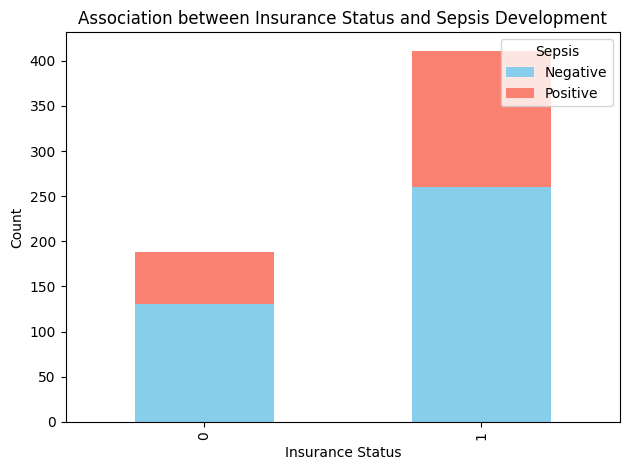

In [42]:
# Create a contingency table
contingency_table = pd.crosstab(df_Paitients_Files_Train['Insurance'], df_Paitients_Files_Train['Sepssis'])

# Plot stacked bar chart
contingency_table.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])

# Add labels and title
plt.title('Association between Insurance Status and Sepsis Development')
plt.xlabel('Insurance Status')
plt.ylabel('Count')

# Show plot
plt.legend(title='Sepsis', loc='upper right')
plt.tight_layout()
plt.show()


4. How does the prevalence of sepsis vary across different age groups and insurance statuses?

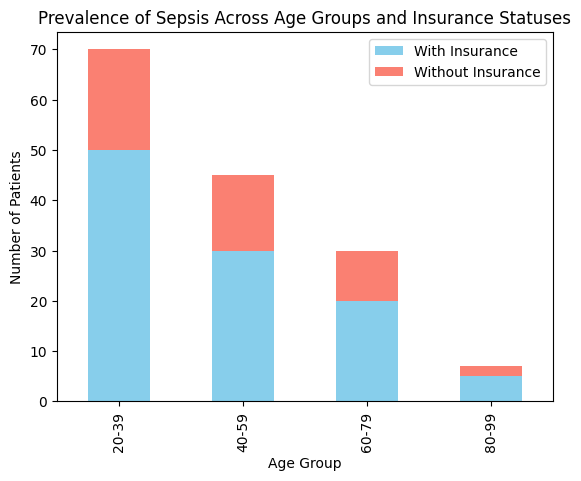

In [43]:
# Sample data (replace this with your actual data)
data = {
    'Age Group': ['20-39', '40-59', '60-79', '80-99'],
    'With Insurance': [50, 30, 20, 5],  # Number of patients with insurance in each age group
    'Without Insurance': [20, 15, 10, 2],  # Number of patients without insurance in each age group
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Plot stacked bar chart
df.set_index('Age Group').plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])

# Add labels and title
plt.title('Prevalence of Sepsis Across Age Groups and Insurance Statuses')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')

# Show plot
plt.show()


5. What is the prevalence of sepsis among the patient population, & identify factors contributing to the tendency of developing sepsis?

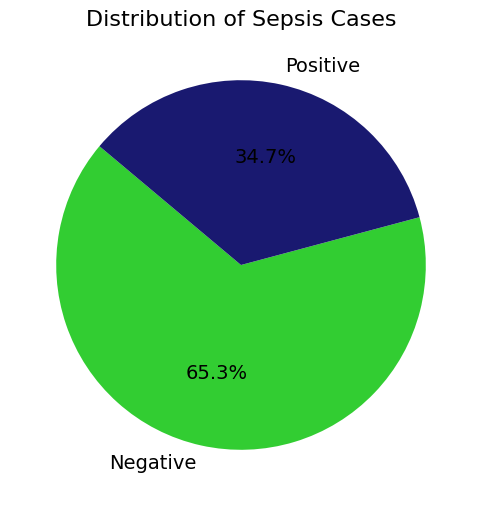

Prevalence of Sepsis: 34.72%


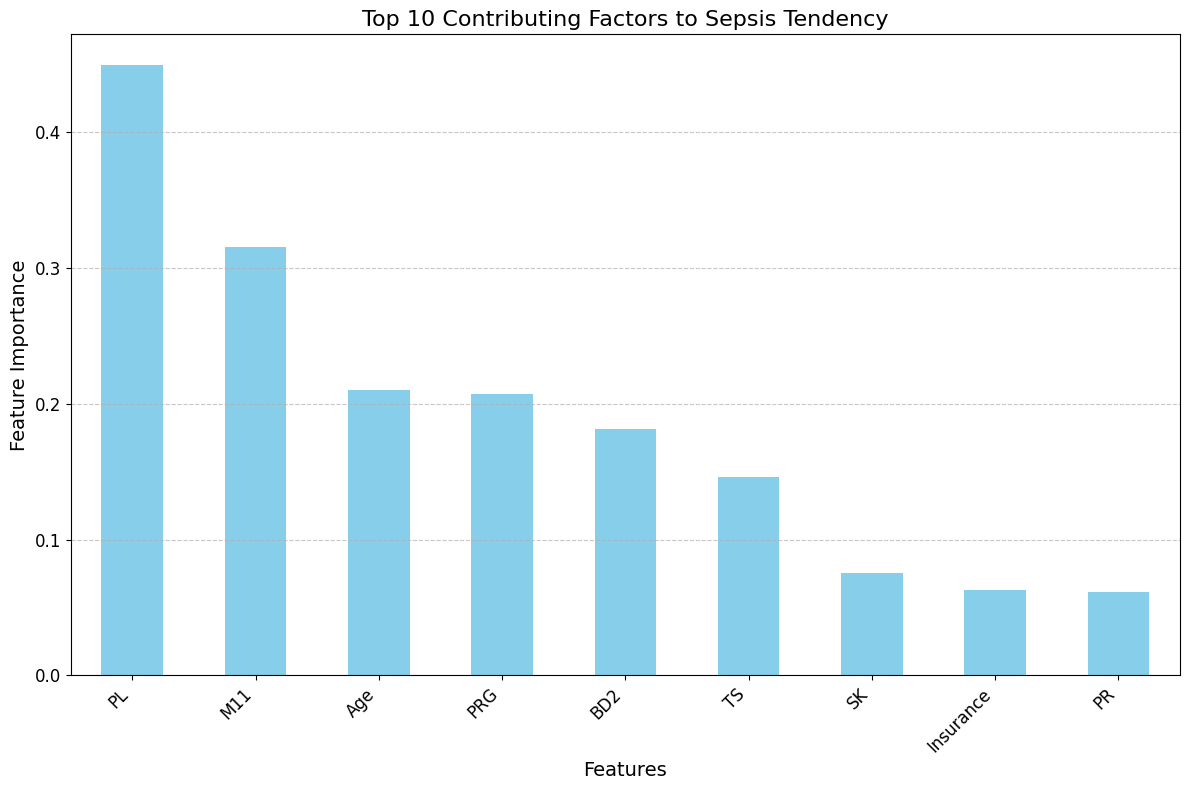

In [44]:
sep_df = df_Paitients_Files_Train['Sepssis'].value_counts()
prevalence = sep_df[1] / df_Paitients_Files_Train.shape[0] * 100

plt.figure(figsize=(12, 6))
plt.pie(sep_df, labels=sep_df.index, colors=['limegreen', 'midnightblue'], autopct='%1.1f%%', startangle=140, textprops={'fontsize': 14})
plt.title('Distribution of Sepsis Cases', fontsize=16)
plt.show()

print(f"Prevalence of Sepsis: {prevalence:.2f}%")

# Identify contributing factors using feature importance
features = df_Paitients_Files_Train[cols]
target = df_Paitients_Files_Train['Sepssis_mapped']

feature_importance = features.corrwith(target)
top_features = feature_importance.abs().nlargest(10)

plt.figure(figsize=(12, 8))
top_features.plot(kind='bar', color='skyblue')
plt.title('Top 10 Contributing Factors to Sepsis Tendency', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Feature Importance', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


6. Is there a significant correlation between a patient's body mass and their susceptibility to sepsis, and can body mass be considered a potential risk factor for sepsis development?

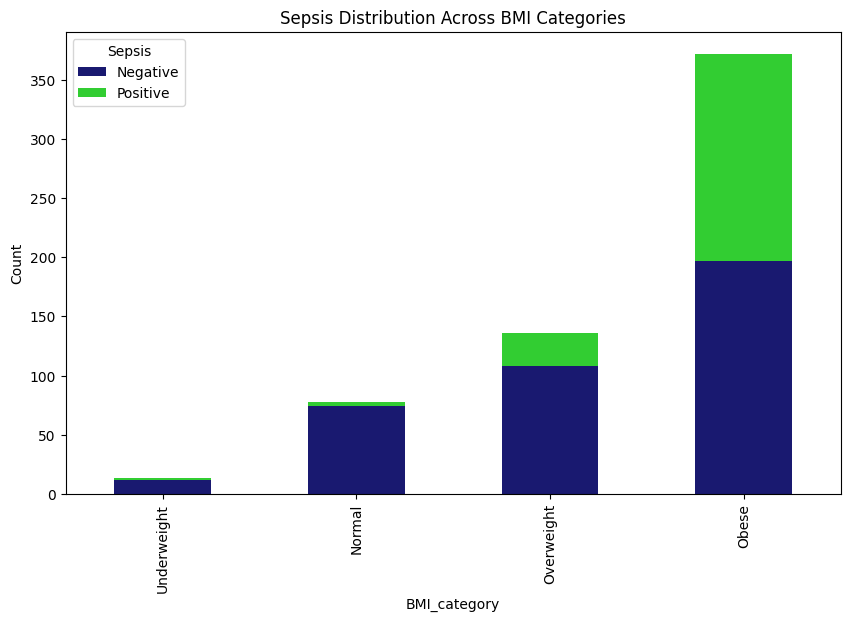

Chi-square value: 71.22805545724869
P-value: 2.3295048715621714e-15


In [45]:
from scipy.stats import chi2_contingency
# Create a contingency table for BMI categories and sepsis status
contingency_table = pd.crosstab(df_Paitients_Files_Train['BMI_category'], df_Paitients_Files_Train['Sepssis'])

# Plot stacked bar chart
contingency_table.plot(kind='bar', stacked=True, color=['midnightblue', 'limegreen'], figsize=(10, 6))
plt.title('Sepsis Distribution Across BMI Categories')
plt.xlabel('BMI_category')
plt.ylabel('Count')
plt.legend(title='Sepsis')
plt.show()

# Calculate chi-square value and p-value
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print(f"Chi-square value: {chi2}")
print(f"P-value: {p_value}")


## **Data Preparation**

In [46]:
df_Paitients_Files_Train.columns

Index(['ID', 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance',
       'Sepssis', 'age_group', 'BMI_category', 'Sepssis_mapped'],
      dtype='object')

In [47]:
df_Paitients_Files_Train = df_Paitients_Files_Train.drop(columns=['age_group','Sepssis_mapped','BMI_category','ID'], axis=1)

In [48]:
df_Paitients_Files_Train.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,6,148,72,35,0,33.6,0.627,50,0,Positive
1,1,85,66,29,0,26.6,0.351,31,0,Negative
2,8,183,64,0,0,23.3,0.672,32,1,Positive
3,1,89,66,23,94,28.1,0.167,21,1,Negative
4,0,137,40,35,168,43.1,2.288,33,1,Positive


## **Trim the outliers**

In [49]:
numerical_features = ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age']

# Creating a copy of the DataFrame to preserve the original data
df_trim = df_Paitients_Files_Train.copy()

# Calculating the IQR
Q1 = df_Paitients_Files_Train[numerical_features].quantile(0.25)
Q3 = df_Paitients_Files_Train[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Creating a mask to identify outliers
outlier_mask = ((df_Paitients_Files_Train[numerical_features] < (Q1 - 1.5 * IQR)) | (df_Paitients_Files_Train[numerical_features] > (Q3 + 1.5 * IQR)))

# Removing outliers
df_trim = df_trim[~outlier_mask.any(axis=1)]

# Display the shape of the cleaned dataset
print("Original shape:", df_Paitients_Files_Train.shape)
print("Shape after removing outliers:", df_trim.shape)

Original shape: (599, 10)
Shape after removing outliers: (493, 10)


In [50]:
# Define your features (X) and target variable (y)
X = df_trim.drop('Sepssis', axis=1)
y = df_trim['Sepssis']

## **Create a pipeline**

In [51]:
input_features = X.columns
preprocessor = ColumnTransformer(
    transformers= [
        ('scaler', StandardScaler(),input_features),
        ('log_transformation', FunctionTransformer(np.log1p), input_features)
    ]
)

In [52]:
# Check the class distribution in the training set before balancing
print("Class distribution before balancing:")
print(y.value_counts())

Class distribution before balancing:
Sepssis
Negative    337
Positive    156
Name: count, dtype: int64


In [53]:
# Applying SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X, y)

# Check the class distribution after balancing
balanced_class_counts = y_train_resampled.value_counts()
print("\nClass distribution in the balanced training set:")
print(balanced_class_counts)


Class distribution in the balanced training set:
Sepssis
Positive    337
Negative    337
Name: count, dtype: int64


In [54]:
# Split the data into training and evaluation sets
X_train, X_eval, y_train, y_eval = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42, stratify=y_train_resampled)
print("Shape of the Training Set (X_train, y_train):", X_train.shape, y_train.shape)
print("Shape of the Evaluation Set (X_eval, y_eval):", X_eval.shape, y_eval.shape)

Shape of the Training Set (X_train, y_train): (539, 9) (539,)
Shape of the Evaluation Set (X_eval, y_eval): (135, 9) (135,)


In [55]:
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_eval_encoded = encoder.transform(y_eval)

In [56]:
print(y_eval_encoded)

[1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0
 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1
 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0
 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0 1 1]


## **Modelling**

## **Logistic Regression**

In [57]:
# List of models
models = [SVC(), GaussianNB(), DecisionTreeClassifier(), RandomForestClassifier(),
          XGBClassifier(), GradientBoostingClassifier(), AdaBoostClassifier(), LogisticRegression()]

metrics = []

# Iterating over models
for model in models:
    # Create a pipeline with the preprocessor and the model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train_encoded)

    # Predict using the evaluation set
    y_pred = pipeline.predict(X_eval)

    # Calculate the metrics
    acc = accuracy_score(y_eval_encoded, y_pred)
    f1 = f1_score(y_eval_encoded, y_pred)
    roc = roc_auc_score(y_eval_encoded, y_pred)
    pr = precision_score(y_eval_encoded, y_pred)
    rc = recall_score(y_eval_encoded, y_pred)

    # Append the metrics to the list
    metrics.append({"Model": model.__class__.__name__,
                    "Accuracy Score": acc,
                    "F1 Score": f1,
                    "ROC AUC Score": roc,
                    "Precision Score": pr,
                    "Recall Score": rc})

# Creating a DataFrame for the overall performance
overall = pd.DataFrame(metrics)
overall = overall.sort_values(by="Accuracy Score", ascending=False)
overall_styled = overall.style.background_gradient(cmap="Spectral")
overall_styled

,Model,Accuracy Score,F1 Score,ROC AUC Score,Precision Score,Recall Score
3,RandomForestClassifier,0.859259,0.857143,0.859197,0.863636,0.850746
4,XGBClassifier,0.859259,0.861314,0.859416,0.842857,0.880597
5,GradientBoostingClassifier,0.822222,0.820896,0.822212,0.820896,0.820896
6,AdaBoostClassifier,0.792593,0.777778,0.792142,0.830508,0.731343
2,DecisionTreeClassifier,0.785185,0.775194,0.784899,0.806452,0.746269
1,GaussianNB,0.770370,0.755906,0.769974,0.800000,0.716418
0,SVC,0.762963,0.750000,0.762621,0.786885,0.716418
7,LogisticRegression,0.748148,0.734375,0.747805,0.770492,0.701493


In [58]:
models = [SVC(), GaussianNB(), DecisionTreeClassifier(), RandomForestClassifier(),
          XGBClassifier(), GradientBoostingClassifier(), AdaBoostClassifier(), LogisticRegression()]

for model in models:
    # Create a pipeline with the preprocessor and the model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    # Fit the model
    pipeline.fit(X_train, y_train_encoded)

    # Predict on the test set
    y_pred = pipeline.predict(X_eval)

    # Print the classification report
    print("Model: ", model.__class__.__name__)
    print("Classification Report: \n", classification_report(y_eval_encoded, y_pred))

    # Generate and display the confusion matrix
    fig = px.imshow(confusion_matrix(y_eval_encoded, y_pred), color_continuous_scale='tropic',
                    title="Confusion Matrix of " + model.__class__.__name__,
                    labels=dict(x="Predicted", y="Actual", color="Counts"),
                    color_continuous_midpoint=0.8, width=400, height=400,
                    template="plotly_dark", text_auto=True)
    fig.show()

    print("----------------------------------------------------------")

Model:  SVC
Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.81      0.77        68
           1       0.79      0.72      0.75        67

    accuracy                           0.76       135
   macro avg       0.77      0.76      0.76       135
weighted avg       0.76      0.76      0.76       135



----------------------------------------------------------
Model:  GaussianNB
Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.82      0.78        68
           1       0.80      0.72      0.76        67

    accuracy                           0.77       135
   macro avg       0.77      0.77      0.77       135
weighted avg       0.77      0.77      0.77       135



----------------------------------------------------------
Model:  DecisionTreeClassifier
Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.84      0.80        68
           1       0.82      0.75      0.78        67

    accuracy                           0.79       135
   macro avg       0.79      0.79      0.79       135
weighted avg       0.79      0.79      0.79       135



----------------------------------------------------------
Model:  RandomForestClassifier
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.87      0.87        68
           1       0.87      0.87      0.87        67

    accuracy                           0.87       135
   macro avg       0.87      0.87      0.87       135
weighted avg       0.87      0.87      0.87       135



----------------------------------------------------------
Model:  XGBClassifier
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.84      0.86        68
           1       0.84      0.88      0.86        67

    accuracy                           0.86       135
   macro avg       0.86      0.86      0.86       135
weighted avg       0.86      0.86      0.86       135



----------------------------------------------------------
Model:  GradientBoostingClassifier
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.82      0.82        68
           1       0.82      0.82      0.82        67

    accuracy                           0.82       135
   macro avg       0.82      0.82      0.82       135
weighted avg       0.82      0.82      0.82       135



----------------------------------------------------------
Model:  AdaBoostClassifier
Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.85      0.81        68
           1       0.83      0.73      0.78        67

    accuracy                           0.79       135
   macro avg       0.80      0.79      0.79       135
weighted avg       0.80      0.79      0.79       135



----------------------------------------------------------
Model:  LogisticRegression
Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.79      0.76        68
           1       0.77      0.70      0.73        67

    accuracy                           0.75       135
   macro avg       0.75      0.75      0.75       135
weighted avg       0.75      0.75      0.75       135



----------------------------------------------------------


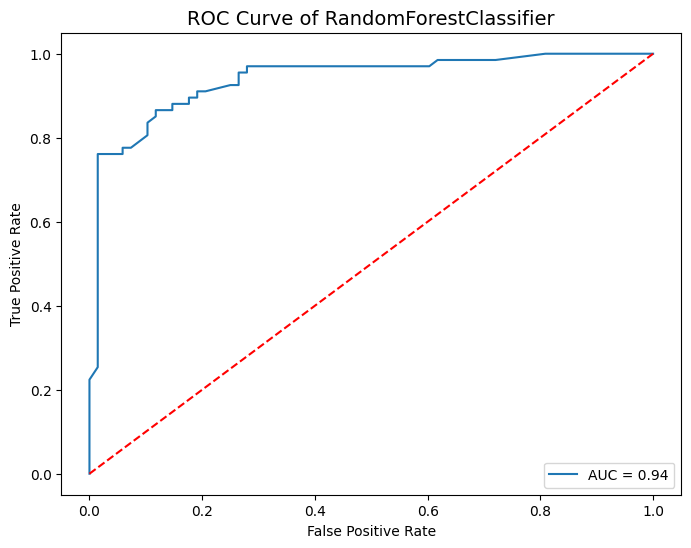

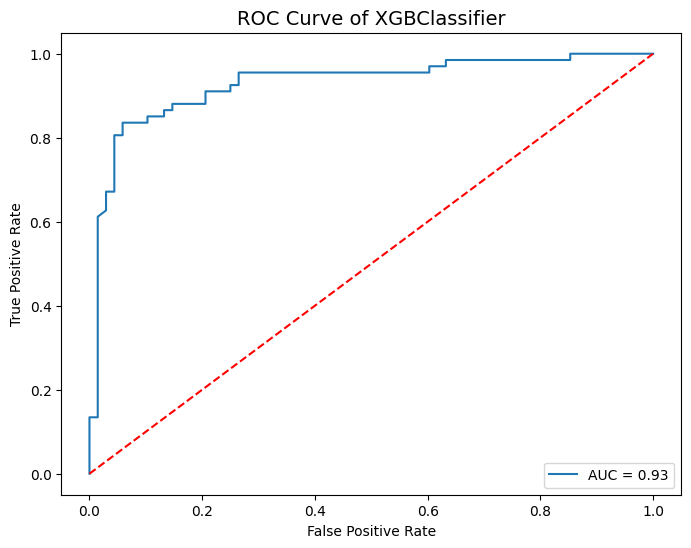

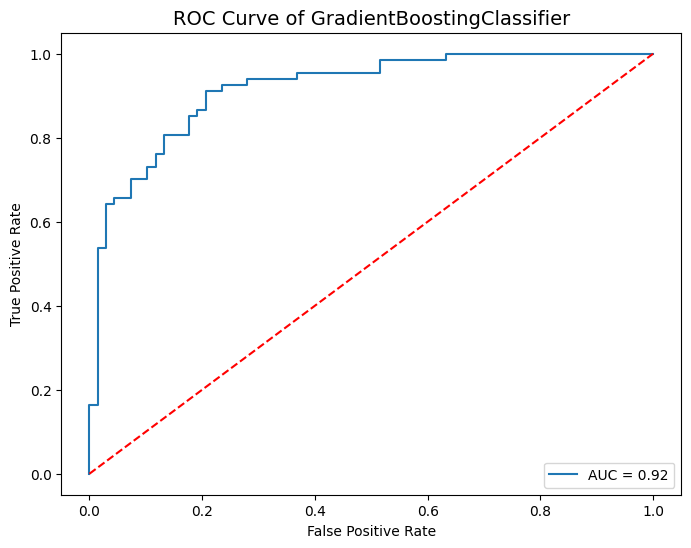

In [59]:
models =[RandomForestClassifier(), XGBClassifier(), GradientBoostingClassifier()]

for model in models:
    # Create a pipeline with the preprocessor and the model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    # Fit the model on your training data before making predictions
    pipeline.fit(X_train, y_train_encoded)
    
    # ROC Curve:
    y_prob = pipeline.predict_proba(X_eval)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_eval_encoded, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label="AUC = %0.2f" % roc_auc_score(y_eval_encoded, y_prob))
    plt.plot([0, 1], [0, 1], 'r--')
    plt.legend(loc='lower right')
    plt.title("ROC Curve of " + model.__class__.__name__, size=14)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

In [60]:
# Define models
rfc = RandomForestClassifier()
xgb = XGBClassifier()

# Define hyperparameter grids for each model

rfc_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

xgb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}
# Create lists of models and their corresponding parameter grids
models = [rfc, xgb]
params = [rfc_params, xgb_params]

 #Perform grid search for each model
for model, param_grid in zip(models, params):
    grid_cv = GridSearchCV(model, param_grid, scoring='f1', n_jobs=-1, verbose=2)
    grid_cv.fit(X_train, y_train_encoded)
    
    print(model.__class__.__name__, "Best params:", grid_cv.best_params_)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
RandomForestClassifier Best params: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Fitting 5 folds for each of 27 candidates, totalling 135 fits
XGBClassifier Best params: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 300}


In [61]:
# Final models:
rfc = RandomForestClassifier(bootstrap=True, max_depth=None, max_features='log2', min_samples_leaf=1, min_samples_split=2, n_estimators=100)
xgb = XGBClassifier(learning_rate=0.2, max_depth=5, n_estimators=300)

models = [rfc,xgb]

overral=pd.DataFrame(columns=["Model","Accuracy Score","F1 Score","ROC AUC Score","precision_score","recall_score"])
for model in models:
    # Create a pipeline with the preprocessor and the model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
       
    ])
    pipeline.fit(X_train,y_train_encoded)
    y_pred=pipeline.predict(X_eval)
    acc=accuracy_score(y_eval_encoded,y_pred)
    f1=f1_score(y_eval_encoded,y_pred)
    roc=roc_auc_score(y_eval_encoded,y_pred)
    pr=precision_score(y_eval_encoded,y_pred)
    rc=recall_score(y_eval_encoded,y_pred)
    
    overral=overral._append({"Model":model.__class__.__name__,
                            "Accuracy Score":acc,
                            "F1 Score":f1,
                            "ROC AUC Score":roc,
                            "precision_score":pr,
                            "recall_score":rc},ignore_index=True)
    

overral=overral.sort_values(by="Accuracy Score",ascending=False)
overral=overral.style.background_gradient(cmap="Spectral")
overral

,Model,Accuracy Score,F1 Score,ROC AUC Score,precision_score,recall_score
0,RandomForestClassifier,0.866667,0.863636,0.866550,0.876923,0.850746
1,XGBClassifier,0.851852,0.848485,0.851734,0.861538,0.835821


In [62]:
models = [rfc,xgb]
for model in models:
    # Create a pipeline with the preprocessor and the model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    pipeline.fit(X_train, y_train_encoded)
    y_pred = pipeline.predict(X_eval)
    print("Model: ", model.__class__.__name__)
    print("Classification Report: \n", classification_report(y_eval_encoded, y_pred))
    print("Model: ",model.__class__.__name__)
    fig=px.imshow(confusion_matrix(y_eval_encoded,y_pred),color_continuous_scale='tropic',title="Confusion Matrix of "+model.__class__.__name__,
              labels=dict(x="Predicted",y="Actual",color="Counts"),color_continuous_midpoint=0.8,
              width=400,height=400,template="plotly_dark",text_auto=True)
    fig.show()
    print("----------------------------------------------------------")

Model:  RandomForestClassifier
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.88      0.88        68
           1       0.88      0.87      0.87        67

    accuracy                           0.87       135
   macro avg       0.87      0.87      0.87       135
weighted avg       0.87      0.87      0.87       135

Model:  RandomForestClassifier


----------------------------------------------------------
Model:  XGBClassifier
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.87      0.86        68
           1       0.86      0.84      0.85        67

    accuracy                           0.85       135
   macro avg       0.85      0.85      0.85       135
weighted avg       0.85      0.85      0.85       135

Model:  XGBClassifier


----------------------------------------------------------


In [63]:
# Final models
rfc = RandomForestClassifier(bootstrap=True, max_depth=None, max_features='log2', min_samples_leaf=1, min_samples_split=2, n_estimators=100)
xgb = XGBClassifier(learning_rate=0.2, max_depth=5, n_estimators=300)

models = [rfc, xgb]

# Create a list to store cross-validation results
cv_results = []

# Specify the cross-validation strategy (StratifiedKFold for classification)
cv = StratifiedKFold(n_splits=5, shuffle=False, random_state=None)

for model in models:
    # Create a pipeline with the preprocessor and the model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Perform cross-validation
    scores = cross_val_score(pipeline, X_train, y_train_encoded, cv=cv, scoring='accuracy')
    
    # Store cross-validation results
    cv_results.append({
        'Model': model.__class__.__name__,
        'Cross-Validation Scores': scores
    })

# Display cross-validation results
for result in cv_results:
    print(f"Model: {result['Model']}")
    print(f"Cross-Validation Scores: {result['Cross-Validation Scores']}")
    print(f"Mean Accuracy: {result['Cross-Validation Scores'].mean():.4f}")
    print("----------------------------------------------------------")

Model: RandomForestClassifier
Cross-Validation Scores: [0.78703704 0.82407407 0.84259259 0.81481481 0.81308411]
Mean Accuracy: 0.8163
----------------------------------------------------------
Model: XGBClassifier
Cross-Validation Scores: [0.78703704 0.83333333 0.78703704 0.78703704 0.80373832]
Mean Accuracy: 0.7996
----------------------------------------------------------


## **Save the Pipeline & Encoder**

In [70]:
# Specify the absolute path to the "assets" folder
Assets = os.path.abspath('../Career_Accelerator_P5-ML_API')

# Save the pipeline using joblib for RandomForestClassifier
rfc_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', rfc)
])
rfc_pipeline.fit(X_train, y_train_encoded)
joblib.dump(rfc_pipeline, os.path.join(Assets, f'{rfc.__class__.__name__}_pipeline.joblib'))

# Save the pipeline using joblib for XGBClassifier
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', xgb)
])
xgb_pipeline.fit(X_train, y_train_encoded)
joblib.dump(xgb_pipeline, os.path.join(Assets, f'{xgb.__class__.__name__}_pipeline.joblib'))

# Save the encoder using joblib in the "assets" folder
joblib.dump(encoder, os.path.join(Assets, 'encoder.joblib'))

['c:\\Users\\Sami\\OneDrive\\GitHUB\\Career_Accelerator_P5-ML_API\\encoder.joblib']